## Correlation and Regression

### Correlation and regression are the most commonly used techniques for investigating relationship between two quantitative variables.

####  Strength of the relationship is quantified by Correlation Coefficient.

#### Relationship in the form of an equation is expressed by the regression.


$R^2$ term is the coefficient of determination and it reflects how well the model fits the observed data.

The coefficient of determination is given by $R^2$ = 1 - $\frac{SSE}{SST}$

* Let y be the observed response.
* $\hat{y}$ be the predicted value for the response
* $\overline{y}$ be the mean of the response

SSE = $\sum_{i=1}^{n}{(y_i - \hat{y}_i)}^2$

SST = $\sum_{i=1}^{n}{(y_i - \overline{y}_i)}^2$

### Example 1

The dataset, *mtcars* is an in-built data set about cars which contains 32 observations and 11 variables. 

https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html

The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models). 

| Sl No | Variable | Description |
| ---- | ---------------- | ------------------------------------- |
| 1 | mpg | Miles/(US) gallon | 
| 2 | cyl | Number of cylinders | 
| 3 | disp | Displacement (cu.in.) |  
| 4 | hp | Gross horsepower  |  
| 5 | drat | Rear axle ratio | 
| 6 | wt | Weight (1000 lbs) | 
| 7 | qsec | 1/4 mile time | 
| 8 | vs | Engine (0 = V-shaped, 1 = straight) | 
| 9 | am | Transmission (0 = automatic, 1 = manual)  | 
| 10 | gear | Number of forward gears  | 
| 11 | carb | Number of carburetors  | 

#### a.	Construct a scatter plot to show the relationship between the variables cars.mpg and cars.wt

#### b.	Measure the relative strength of a linear relationship between the cars.mpg and cars.wt by calculating the sample correlation coefficient

#### c.	Give your inference on the relationship between these variables

#### d.	Give the simple linear regression equation between cars.mpg and cars.wt

#### e. Predict the mpg of the car for wt = 3000 lbs

In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import statsmodels.api   as sm

In [3]:
cars = sm.datasets.get_rdataset('mtcars').data
print(cars.head(4).T)
print(cars.info())

      Mazda RX4  Mazda RX4 Wag  Datsun 710  Hornet 4 Drive
mpg       21.00         21.000       22.80          21.400
cyl        6.00          6.000        4.00           6.000
disp     160.00        160.000      108.00         258.000
hp       110.00        110.000       93.00         110.000
drat       3.90          3.900        3.85           3.080
wt         2.62          2.875        2.32           3.215
qsec      16.46         17.020       18.61          19.440
vs         0.00          0.000        1.00           1.000
am         1.00          1.000        1.00           0.000
gear       4.00          4.000        4.00           3.000
carb       4.00          4.000        1.00           1.000
<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
mpg     32 non-null float64
cyl     32 non-null int64
disp    32 non-null float64
hp      32 non-null int64
drat    32 non-null float64
wt      32 non-null float64
qsec    32 non

#### Answer

a.	Construct a scatter plot to show the relationship between the variables cars.mpg and cars.wt

#### Scatter plots are made using regplot() function of the seaborn library.

#### This plot draws a linear regression fit by default.

####  We provide two input variables, cars.mpg and cars.wt and confidence interval of 95 as size of the confidence interval for the regression estimate.

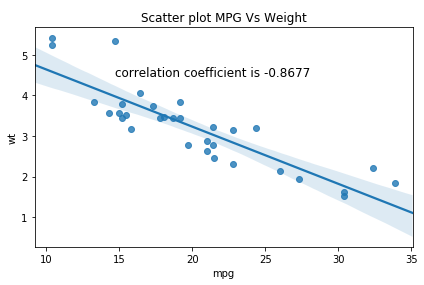

In [3]:
sns.regplot(x=cars.mpg, y=cars.wt, ci = 95)

corcoef = np.corrcoef(cars.mpg, cars.wt)[0,1]

text_cc = '\n\n\n\ncorrelation coefficient is %1.4f'%corcoef
plt.title('Scatter plot MPG Vs Weight')
plt.suptitle(text_cc)
plt.gcf().tight_layout()
# plt.text(15,6.5,text_cc)

plt.show()

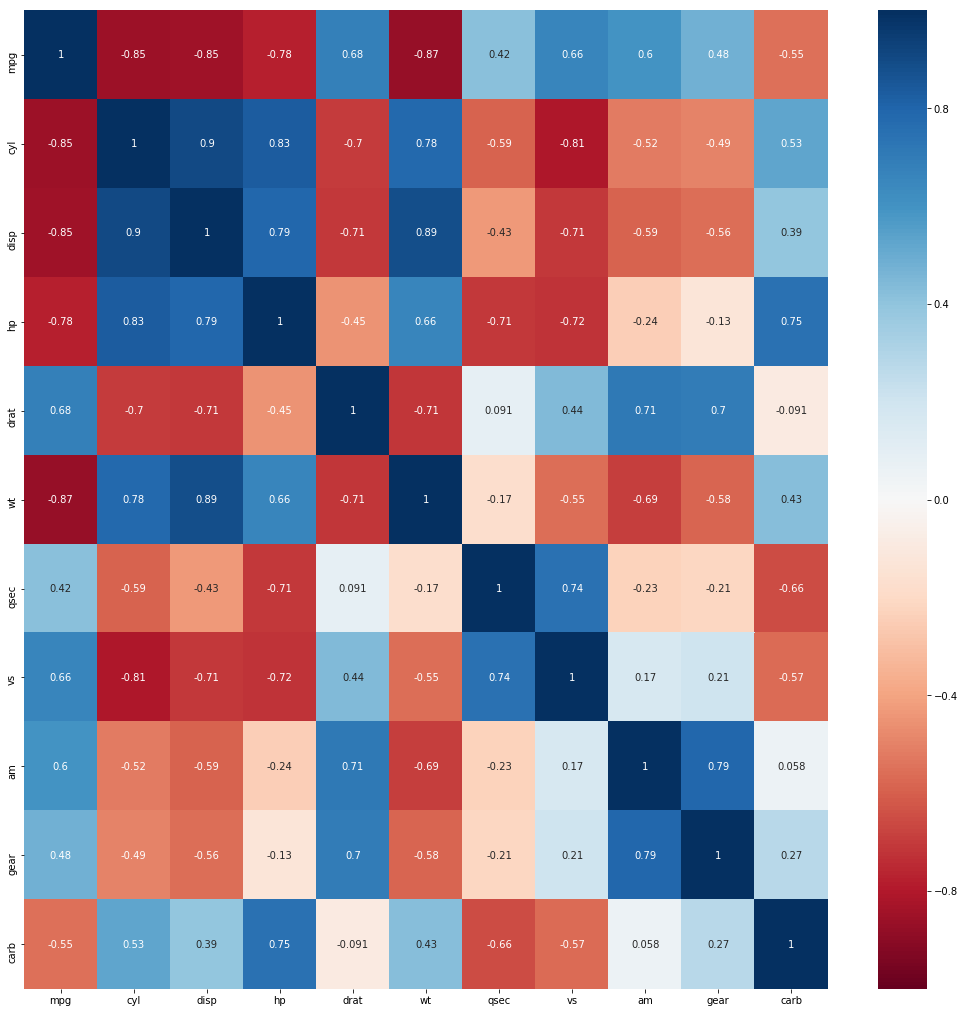

In [5]:
plt.figure(figsize=(18,18)) #setting figure size
sns.heatmap(cars.corr(), annot=True,vmax=1,vmin=-1,cmap='RdBu')
plt.show()

#### b.	Measure the relative strength of a linear relationship between the cars.mpg and cars.wt by calculating the sample correlation coefficient

Numpy corrcoef() returns the *Pearson product-moment correlation coefficients*.

In [5]:
print('\nCorrelation coefficient between mpg and wt is %1.2f' %np.corrcoef(cars.mpg, cars.wt)[0,1])


Correlation coefficient between mpg and wt is -0.87


#### c.	Give your inference on the relationship between these variables

There is a strong negative linear relationship between miles per gallon and the weight of the car since the correlation coefficient is -87%

#### d.	Give the simple linear regression equation between cars.mpg and cars.wt

There are two main ways to perform linear regression in Python.

https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

* 1) Statsmodels
* 2) scikit-learn

## 1) Use the Linear Regression in Statsmodels.

We use statsmodels.api.OLS() to fit a regression line that would minimize the square of distance from the regression line. 
We try to fit a regression line between an independent variable, mpg and a dependent variable, wt.

Please note that statsmodels does not add a constant by default.

In [6]:
import statsmodels.api as sm
X  =  cars.wt
y  =  cars.mpg

X = sm.add_constant(X) # Add an intercept to our model

model         = sm.OLS(y, X).fit() ## OLS(output, input)
predictions   = model.predict(X)

## Print the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Sat, 01 Dec 2018   Prob (F-statistic):           1.29e-10
Time:                        17:11:42   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2851      1.878     19.858      0.000      33.450      41.120
wt            -5.3445      0.559     -9.559      0.000      -6.486      -4.203
==============================================================================
Omnibus:                        2.988   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                2.399
Skew:                           0.668   Prob(JB):                        0.301
Kurtosis:                       2.877   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
 # calculate SSE & SST

SSE   = 0
SST   = 0

for i in range(len(predictions)):
    SSE    += (predictions[i] - y[i])**2

yMean       = np.mean(y)

for i in range(len(predictions)):
    SST    += (y[i] - yMean)**2

print('SSE = %5.4f SST = %5.4f' % (SSE, SST))

Rsq = np.round(1 - (SSE / SST),4)

print("Calculated %s = %1.3f" % ("R squared",Rsq) )     

SSE = 278.3219 SST = 1126.0472
Calculated R squared = 0.753


### Interpretation

#### The coefficient of -5.3445 means that as the wt variable increases by 1 unit, the predicted value of mpg decreases by 5.3445. 

* R squared give the percentage of variance our model explains. Our model explains 75.3% of variation
* Standard error is the standard deviation of the sampling distribution of a statistic such as mean.
* The t scores and p-values for the hypothesis test the wt has statistically significant p-value at 5% level of significance since p-value is less than 5%. 
* There is a 95% confidence intervals for the wt.

** We predict at 95% confidence that the value of wt is between -6.486 and -4.203*

### Regression equation is given below:

#### mpg = 37.2851 - 5.3345 * wt 

#### This model explains 75.3% of variation

#### When wt increases by 1 unit, the mpg decreases by -5.3445.

#### e. Predict the mpg of the car for wt = 3000 lbs

In [8]:
new_X = [ 1, 3.0] # Here we give 1 as the constant for the intercept of model and 3 (in '000s) as the weight 
predictions   = model.predict(new_X)
print('Predicted mpg of the car with weight  %d(000 lbs) is %2.2f' % (3.0, np.round(predictions,3)))

Predicted mpg of the car with weight  3(000 lbs) is 21.25


## 2) Use the Linear Regression in sklearn.

In order to use linear regression, we need to import linear_model of SKLearn.

In [9]:
from sklearn import linear_model

In [1]:
#or
from sklearn.linear_model import LinearRegression

In [2]:
lm= LinearRegression()

#### Fit a model 

In [10]:
X         =  np.array(cars.wt).reshape(-1, 1)
y         =  cars.mpg
lm        =  linear_model.LinearRegression()
model     =  lm.fit(X, y)

### Predict the target variable

In [3]:
predictions = lm.predict(X) #yhat values
predictions

NameError: name 'X' is not defined

### To get the $R^2$ score of the model, use

In [12]:
print('R square is %1.3f' %lm.score(X, y)) #Rsquare

R square is 0.753


### To check the coefficients of the predictors, use

In [13]:
b1 = np.round(lm.coef_,4) #b1,b2,b3...bn
print('Coefficient for wt is %5.4f' %b1)

Coefficient for wt is -5.3445


### To get the intercept

In [14]:
print('Intercept is %5.4f' %lm.intercept_)  #b0

Intercept is 37.2851


## Residual plots

#### Residual plot is a scatter plot of fitted values against the residuals, with a *locally weighted scatterplot smoothing (lowess)* regression line showing any apparent trend.

#### Using seaborn, residplot() with fitted values as x parameter, and the dependent variable as y.  The argument, lowless = True makes sure the lowess regression line is drawn.




+ *Lowess stands for Locally wighted least sqaures.*
+ *Lowess is a data analysis technique for producing a **Smooth** set of values from a scatter plot with a *noisy* relationship between the two variables.


### Example 2

Construct a residual plot for example 1.

In [23]:
sns.set(style="whitegrid")
import statsmodels.api as sm
X  =  cars.wt
y  =  cars.mpg

X = sm.add_constant(X) # Add an intercept to our model

model                 = sm.OLS(y, X).fit() ## OLS(output, input)
cars['predictions']   = model.predict(X)
residuals             = model.resid

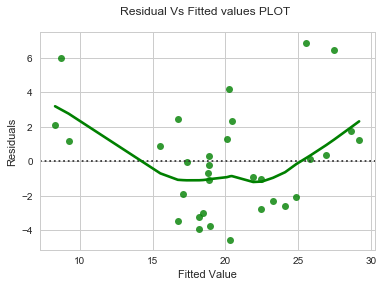

In [24]:
# Plot the residuals after fitting a linear model
ax = sns.residplot(cars.predictions, residuals, lowess = True, color = "g")
ax.set(xlabel='Fitted Value', ylabel='Residuals', title = 'Residual Vs Fitted values PLOT \n')
plt.show()

### Draw a histogram of the residuals

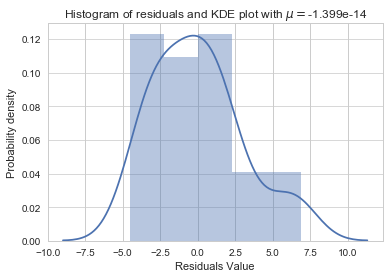

In [25]:
sns.set(style="whitegrid")
sns.distplot(residuals)

plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Residuals Value')
plt.ylabel('Probability density') # It is the probability per unit on the x-axis.

mean     =   residuals.mean()

plt.title('Histogram of residuals and KDE plot with ' + r'$\mu = $' + str(np.round(mean,17)))
plt.show()

### Ideal Plot

We expect the **random errors** to produce residuals that are normally distributed. So, the residuals should fall in a *symmetrical pattern and have a constant spread throughout the range*. 

#### Inference

In the above plot, we can predict non-zero values for the residuals based on the fitted value. For example, values upto 10 and above 25 produce non-zero values for the residuals.

The non-random pattern in the residuals indicates that the predictor variables of the model is not capturing some explanatory information getting into the residuals.

### Increase predictors to the regression model

#### R square is the proportional improvement in prediction from the regression model compared to the mean model and thus indicates the goodness of fit of the model.

* R square can only increase as predictors or independent variables are added to the regression model. 
* The increase is artificial when predictors are not actually improving the model's fit. 
* Adjusted R square incorporates the model's degrees of freedom in such a way that Adjusted R square will decrease as predictors are added if the decrease in model fit does not make up for the loss of degrees of freedom.

https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/


### Example


#### Let us try with two predictors for the example 1.

In [40]:
import statsmodels.api   as sm
import scipy.stats       as stats
import matplotlib.pyplot as plt

X  =  cars[["wt", "disp"]]
y  =  cars.mpg

X = sm.add_constant(X) # Add an intercept to our model
print(X)

                     const     wt   disp
Mazda RX4              1.0  2.620  160.0
Mazda RX4 Wag          1.0  2.875  160.0
Datsun 710             1.0  2.320  108.0
Hornet 4 Drive         1.0  3.215  258.0
Hornet Sportabout      1.0  3.440  360.0
Valiant                1.0  3.460  225.0
Duster 360             1.0  3.570  360.0
Merc 240D              1.0  3.190  146.7
Merc 230               1.0  3.150  140.8
Merc 280               1.0  3.440  167.6
Merc 280C              1.0  3.440  167.6
Merc 450SE             1.0  4.070  275.8
Merc 450SL             1.0  3.730  275.8
Merc 450SLC            1.0  3.780  275.8
Cadillac Fleetwood     1.0  5.250  472.0
Lincoln Continental    1.0  5.424  460.0
Chrysler Imperial      1.0  5.345  440.0
Fiat 128               1.0  2.200   78.7
Honda Civic            1.0  1.615   75.7
Toyota Corolla         1.0  1.835   71.1
Toyota Corona          1.0  2.465  120.1
Dodge Challenger       1.0  3.520  318.0
AMC Javelin            1.0  3.435  304.0
Camaro Z28      

In [41]:
model         = sm.OLS(y, X).fit() ## OLS(output, input)
predictions   = model.predict(X)

## Print the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     51.69
Date:                Sat, 01 Dec 2018   Prob (F-statistic):           2.74e-10
Time:                        17:11:48   Log-Likelihood:                -78.084
No. Observations:                  32   AIC:                             162.2
Df Residuals:                      29   BIC:                             166.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.9606      2.165     16.151      0.000      30.534      39.388
wt            -3.3508      1.164     -2.878      0.007      -5.732      -0.970
disp          -0.0177      0.009     -1.929      0.064      -0.037       0.001
==============================================================================
Omnibus:                        4.079   Durbin-Watson:                   1.277
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                3.665
Skew:                           0.812   Prob(JB):                        0.160
Kurtosis:                       2.666   Cond. No.                     1.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### You may observe that both the $R^2$ and Adjusted $R^2$ has increased from what we have seen in exampe 1.
* Regression Model with two predictors  $R^2$ is 0.781 while it is 0.753 with one predictor.
* Regression Model with two predictors  $Adjusted R^2$ is 0.766 while it is 0.745 with one predictor.


### Regression equation is given below:

#### mpg = 34.9606 - 3.3508 * wt  - 0.0177  * disp

#### This model explains 76.6% of variation (using Adj R sq).

#### Other variables remaining constant, when wt increases by 1 unit, the mpg decreases by 3.3508.

#### Other variables remaining constant, when disp increases by 1 unit, the mpg decreases by 0.0177.

####  In class lab : Practice Exercise

Try with three predictors for the example 5 by adding one more variable, qsec.
Confirm whether predictors are actually improving the model's fit by comparing R square and Adjusted R square.

## END